In [66]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import seaborn as sns

# Download the latest version of the dataset
dataset_path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

print("Dataset path:", dataset_path)

# List files in the dataset directory
files = os.listdir(dataset_path)
print("Files in dataset:", files)

# Choose the correct CSV file (replace 'your_file.csv' with the actual file name)
csv_file = [f for f in files if f.endswith('.csv')]
if not csv_file:
    raise FileNotFoundError("No CSV file found in the dataset directory.")
csv_file_path = os.path.join(dataset_path, csv_file[0])

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows
print(df.head())


Dataset path: C:\Users\jimco\.cache\kagglehub\datasets\rabieelkharoua\alzheimers-disease-dataset\versions\1
Files in dataset: ['alzheimers_disease_data.csv']
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...            

In [67]:
# 2.1 Initial Data Inspection
print(df.info())  # Check data types and missing values
print(df.describe()) # Basic statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [68]:
df['Diagnosis'] = df['Diagnosis'].astype(int)

In [69]:
# 2.2 Identify Non-Numeric Columns and Handle Missing Values:

# Identify columns with non-numeric data
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['DoctorInCharge'], dtype='object')


In [70]:
df = df.drop(['DoctorInCharge'], axis=1)  # Drop the non-numeric column

In [71]:
print(df.head())  # Check the DataFrame after dropping the column

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0           13.297218          6.327112     1.347214  ...   
1            4.542524          7.619885     0.518767  ...   
2           19.555085          7.844988     1.826335  ...   
3           12.209266          8.428001     7.435604  ...   
4           18.454356          6.310461     0.795498  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
1              7.118696   

In [72]:
#2.3 Handling Missing Values:
# Impute missing values using mean or median
imputer = SimpleImputer(strategy='mean')  # Or 'median'
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns  # Select all numerical columns
df[numerical_features] = imputer.fit_transform(df[numerical_features])
# Verify that all missing values have been handled
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
Diffi

In [73]:
# 2.4 Feature Scaling:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#Verify transformation
print(df.head())

   PatientID       Age    Gender  Ethnicity  EducationLevel       BMI  \
0  -1.731245 -0.212368 -1.012644  -0.700408        0.788833 -0.655225   
1  -1.729633  1.567757 -1.012644  -0.700408       -1.422782 -0.114751   
2  -1.728021 -0.212368 -1.012644   2.311955       -0.316974 -1.366428   
3  -1.726409 -0.101111  0.987514  -0.700408       -0.316974  0.851625   
4  -1.724797  1.567757 -1.012644  -0.700408       -1.422782 -0.961607   

    Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0 -0.636784            0.565923          0.492525    -1.253593  ...   
1 -0.636784           -0.954895          0.945093    -1.538442  ...   
2 -0.636784            1.653006          1.023896    -1.088855  ...   
3  1.570391            0.376930          1.227995     0.839804  ...   
4 -0.636784            1.461793          0.486696    -1.443293  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              0.497506         -0.512477           -0.4312

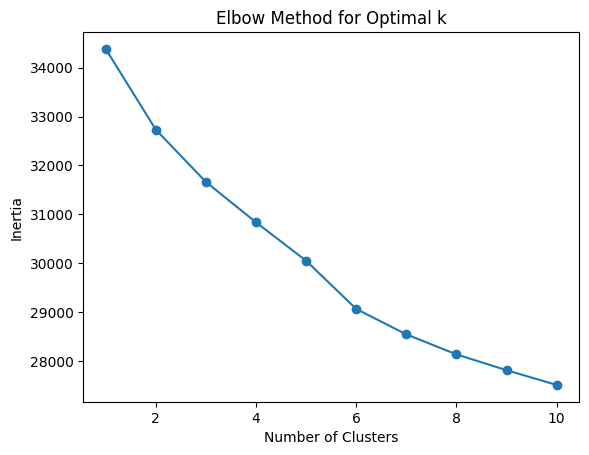

In [74]:
#  3. Clustering with K-Means (using numerical data):

# 3.1 Choose Features for Clustering
cluster_features = ['Age', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']  # Add more features as needed
#Ensure that only available features are being used
cluster_features = [feature for feature in cluster_features if feature in df.columns]

X_cluster = df[cluster_features]

# 3.2 Determine the Optimal Number of Clusters (Elbow Method)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init = 'auto')  # Added n_init
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#Based on the plot, determine what the optimal k value will be


In [75]:
# 3.3 Apply K-Means Clustering
n_clusters = 6  # Replace with your chosen optimal number of clusters from the Elbow Method
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 'auto')
df['Cluster'] = kmeans.fit_predict(X_cluster)

# 3.4 Analyze Clusters
print(df['Cluster'].value_counts()) # See cluster sizes


Cluster
2    588
4    347
1    340
5    293
0    292
3    289
Name: count, dtype: int64


         PatientID       Age    Gender  Ethnicity  EducationLevel       BMI  \
Cluster                                                                       
0         0.057120 -0.268759 -0.046814   0.032050       -0.063244  0.358867   
1         0.000019 -0.481351  0.046263  -0.027057        0.089573  0.088961   
2         0.053886  0.042881  0.028255   0.042436       -0.004790  0.035407   
3        -0.065611 -0.353269 -0.016025  -0.054157        0.054179 -0.096954   
4        -0.103193  0.833520  0.030666  -0.017490       -0.058846 -0.242142   
5         0.021841  0.101660 -0.084243  -0.011574       -0.015047 -0.149530   

          Smoking  AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
Cluster                                                               ...   
0       -0.598990           -0.751626         -0.356531    -0.377281  ...   
1       -0.617309            0.096309          0.196359     0.596218  ...   
2        1.570391           -0.003234          0.015935    

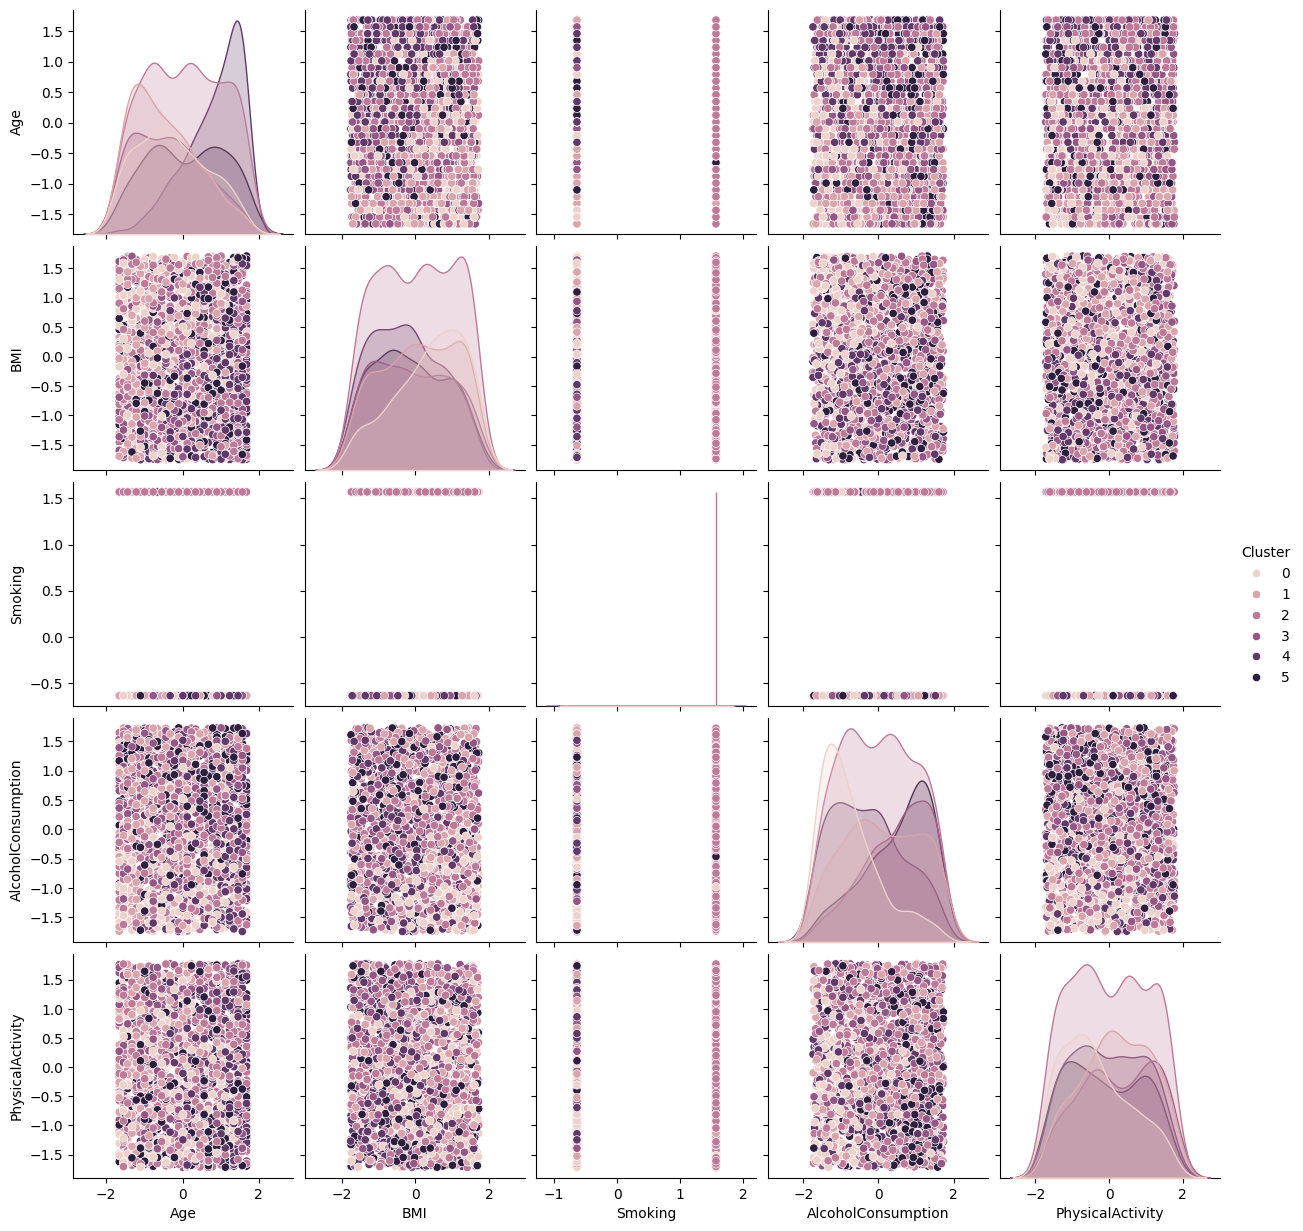

Accuracy: 0.9101
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       401
           1       0.95      0.80      0.87       244

    accuracy                           0.91       645
   macro avg       0.92      0.89      0.90       645
weighted avg       0.91      0.91      0.91       645



In [76]:
# Aggregate Statistics by Cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

#Visualize the clusters, this is optional and you can change the features
sns.pairplot(df, hue='Cluster', vars=cluster_features[:5])  # Adjust vars for different features
plt.show()

# 4. Classification Model (Random Forest):

# 4.1 Prepare Data for Classification

X = df.drop('Diagnosis', axis=1)  # Features (including the 'Cluster' feature)
y = df['Diagnosis']  # Target variable

# 4.2 Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4.3 Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
rf_classifier.fit(X_train, y_train)

# 4.4 Make Predictions
y_pred = rf_classifier.predict(X_test)

# 4.5 Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

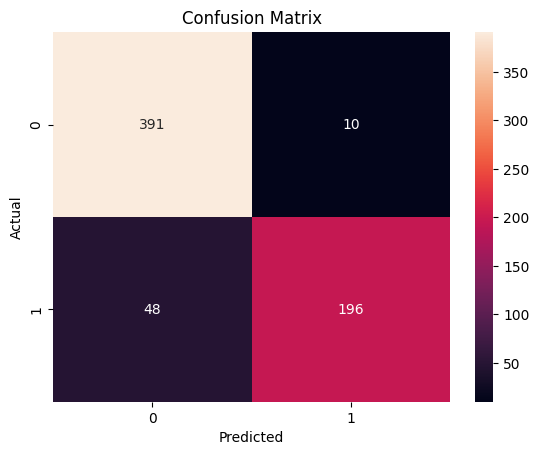

                      Feature  Importance
24       FunctionalAssessment    0.183653
27                        ADL    0.152002
23                       MMSE    0.108892
25           MemoryComplaints    0.081332
0                   PatientID    0.043471
26         BehavioralProblems    0.039088
22   CholesterolTriglycerides    0.030003
21             CholesterolHDL    0.028224
10               SleepQuality    0.028021
9                 DietQuality    0.027970
7          AlcoholConsumption    0.026034
5                         BMI    0.025894
20             CholesterolLDL    0.025768
8            PhysicalActivity    0.025640
18                DiastolicBP    0.024627
1                         Age    0.024331
19           CholesterolTotal    0.023998
17                 SystolicBP    0.022521
33                    Cluster    0.020870
4              EducationLevel    0.009479
3                   Ethnicity    0.006501
2                      Gender    0.003945
11    FamilyHistoryAlzheimers    0

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4.6 Feature Importance
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)
